# Property Recommendation -- Considering Crime at Pittsburgh

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

# Read csv Pittsburgh crime data

In [2]:
df = pd.read_csv('Crime-Data_Pittsburgh.csv')
df.head(2)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,2001543,18110977,29.0,M,B,2018-06-11T10:49:00,"5800 Block E Liberty AV Pittsburgh, PA 15206",9501 Bench Warrant / 13(a)(31) Marijuana: Poss...,"5800 Block E Liberty AV Pittsburgh, PA 15206",East Liberty,5,1113.0,NaN,NaN,0.000000,0.000000
1,1979028,16174235,45.0,M,W,2016-12-19T19:00:00,"900 Block 2nd AV Pittsburgh, PA 15219",3925 Receiving Stolen Property.,"400 Block Winterhill ST Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.024351,40.397372


# Crosstable of Offense type and neighborhood

In [3]:
df_crosstab_dt = pd.crosstab(df.OFFENSES,df.INCIDENTNEIGHBORHOOD,margins=True)
del df_crosstab_dt['All']#delete All column
df_crosstab_dt.head(5)

INCIDENTNEIGHBORHOOD,Allegheny Center,Allegheny West,Allentown,Arlington,Arlington Heights,Banksville,Bedford Dwellings,Beechview,Beltzhoover,Bloomfield,...,Swisshelm Park,Terrace Village,Troy Hill,Troy Hill-Herrs Island,Upper Hill,Upper Lawrenceville,West End,West Oakland,Westwood,Windgap
OFFENSES,,,,,,,,,,,,,,,,,,,,,
028 Curfew Violation / 9093 Indirect Criminal Contempt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100 Fugitive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100 Fugitive / 9136 Commitment to Await Requisition,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1108 Registration without Certificate of Title. / 13(a)(31) Marijuana: Possession Small Amount,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13(a)(10) Nonproprietary Drugs: Sale without License,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Criminals' age histogram(by race)

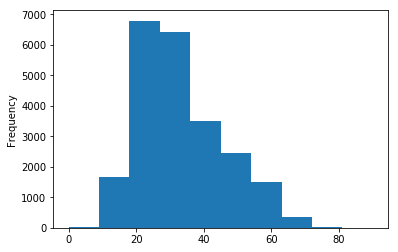

In [4]:
df["AGE"].plot(kind="hist",range=[0, 90])

In [5]:
df["RACE"].unique()

array(['B', 'W', 'O', 'H', 'U', 'A', 'I'], dtype=object)

In [6]:
df["RACE"].value_counts(dropna=False)

B    13426
W     8765
O      262
H      190
U      178
A      102
I        3
Name: RACE, dtype: int64

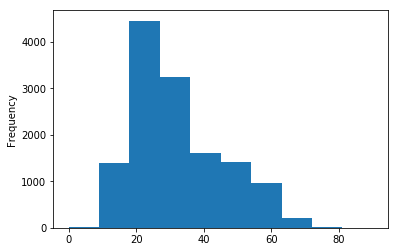

In [7]:
race_filter1 = df["RACE"] == "B"
race_filter2 = df["RACE"] == "W"
df[race_filter1]["AGE"].plot(kind="hist", range=[0, 90])

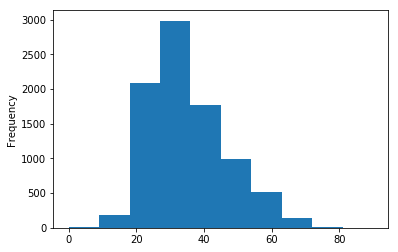

In [8]:
df[race_filter2]["AGE"].plot(kind="hist", range=[0, 90])

# Criminals' gender data

In [9]:
df["GENDER"].value_counts(dropna=False)

M    16773
F     6130
U       23
Name: GENDER, dtype: int64

In [10]:
df["GENDER"].replace('U', np.nan, inplace=True)

In [11]:
df["GENDER"].value_counts(dropna=False)

M      16773
F       6130
NaN       23
Name: GENDER, dtype: int64

In [12]:
import math

def gender_to_category(gender):
    if isinstance(gender, float) and math.isnan(gender):
        return gender
    return int(gender.strip() == "M")

In [13]:
df["GENDER_CODE"] = df["GENDER"].apply(gender_to_category)
df["GENDER_CODE"].value_counts(dropna=False)

 1.0    16773
 0.0     6130
NaN        23
Name: GENDER_CODE, dtype: int64

In [14]:
df["GENDER_CODE"] = df["GENDER_CODE"].astype('category')
df["GENDER_CODE"].dtype

CategoricalDtype(categories=[0.0, 1.0], ordered=False)

In [15]:
df["GENDER_CODE"].head(10)

0    1.0
1    1.0
2    0.0
3    1.0
4    1.0
5    0.0
6    1.0
7    1.0
8    0.0
9    0.0
Name: GENDER_CODE, dtype: category
Categories (2, float64): [0.0, 1.0]

# Crime by neighborhood

In [16]:
df["INCIDENTNEIGHBORHOOD"].value_counts(dropna=False)

South Side Flats             1343
Central Business District    1302
NaN                           856
Carrick                       828
East Allegheny                825
Homewood South                668
East Liberty                  598
Homewood North                569
Mount Washington              551
Bluff                         537
Marshall-Shadeland            515
Knoxville                     494
Hazelwood                     477
Beechview                     442
Sheraden                      438
Lincoln-Lemington-Belmar      429
Brookline                     426
Brighton Heights              388
Allentown                     383
Allegheny Center              380
Middle Hill                   371
East Hills                    370
Perry South                   366
Bloomfield                    350
North Shore                   331
South Side Slopes             314
Crawford-Roberts              311
Shadyside                     307
Central North Side            302
Spring Hill-Ci

In [17]:
grouped = df.groupby("INCIDENTNEIGHBORHOOD")
grouped

In [18]:
grouped.size()

INCIDENTNEIGHBORHOOD
Allegheny Center              380
Allegheny West                 49
Allentown                     383
Arlington                     111
Arlington Heights              43
Banksville                     96
Bedford Dwellings             209
Beechview                     442
Beltzhoover                   211
Bloomfield                    350
Bluff                         537
Bon Air                        84
Brighton Heights              388
Brookline                     426
California-Kirkbride           93
Carrick                       828
Central Business District    1302
Central Lawrenceville         182
Central North Side            302
Central Northside              23
Central Oakland               198
Chartiers City                 16
Chateau                       155
Crafton Heights               193
Crawford-Roberts              311
Duquesne Heights               54
East Allegheny                825
East Carnegie                  20
East Hills                 

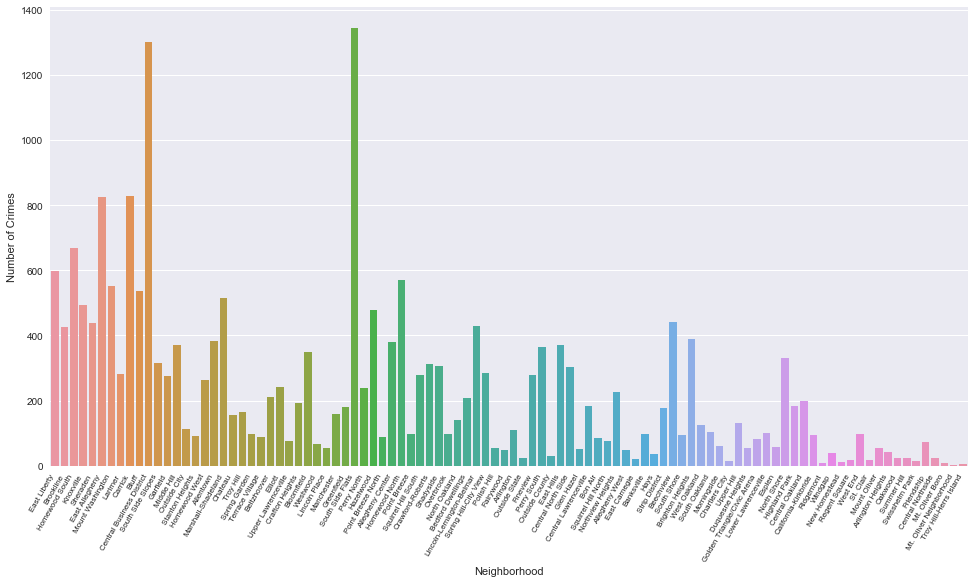

In [19]:
import seaborn as sns
sns.set(style="darkgrid", rc={'figure.figsize':(13.7,8.27)})
ax = sns.countplot(x="INCIDENTNEIGHBORHOOD", data=df )
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right", fontsize=8)
ax.set(xlabel='Neighborhood', ylabel='Number of Crimes')
plt.tight_layout()
plt.show()
fig = ax.get_figure()
fig.savefig('Crime_Neighborhood.png')

# Pittsburgh Crime heatmap

In [20]:
import folium
from folium import plugins
from folium.plugins import HeatMap

PITT_COORDINATES = (40.440624, -79.995888)
map_pittsburgh = folium.Map(location=PITT_COORDINATES,
                    zoom_start = 15) 

df['Latitude'] = df['Y'].astype(float)
df['Longitude'] = df['X'].astype(float)

heat_df = df[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

HeatMap(heat_data).add_to(map_pittsburgh)

map_pittsburgh